<a href="https://colab.research.google.com/github/01Lukaz/analise-filmes-indicium/blob/main/LH_CD_LUCAS_PAULA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Qual tipo de filme deve ser o próximo a ser desenvolvido?


**A introdução de dados externos é permitida - e encorajada**



1.   Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

2. Responda também às seguintes perguntas:
* Qual filme você recomendaria para uma pessoa que você não conhece?
* Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
* Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Features

Series_Title – Nome do filme

Released_Year - Ano de lançamento

Certificate - Classificação etária

Runtime – Tempo de duração

Genre - Gênero

IMDB_Rating - Nota do IMDB

Overview - Overview do filme

Meta_score - Média ponderada de todas as críticas  

Director – Diretor

Star1 - Ator/atriz #1

Star2 - Ator/atriz #2

Star3 - Ator/atriz #3

Star4 - Ator/atriz #4

No_of_Votes - Número de votos

Gross - Faturamento

#**Passo 0: Instalar e importar frameworks**



In [ ]:
!pip install pandas
!pip install numpy
!pip instal matplotlib
!pip install seaborn
!pip install gdown
!pip install requests

ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Passo 1: Aquisição e Entendimento dos Dados**
- Fazer a aquisição do arquivo e a leitura do mesmo, a fim de extrair os dados que serão trabalhados.

- Fazer uma análise primária das informações do dataframe, tipo das features e uma breve descrição dos dados quantitativos.

In [ ]:
url = 'https://github.com/01Lukaz/analise-filmes-indicium/raw/refs/heads/main/desafio_indicium_imdb.csv'

df_imdb  = pd.read_csv(url)


df_imdb

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
df_imdb = df_imdb.drop(columns=['Unnamed: 0'])
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


#**Etapa 1: Tratamento dos dados**

Neste passo, é importante garantir que hipóteses sejam validadas ou não. Ainda, caso este dataframe venha a ser usado por algum modelo de machine learning, é boa prática garantir dados bem estruturados para não enviesar a rede.

- Converter o tipo das colunas.
- Tratar células vazias.



###**Converter Type**
A partir da vizualização do DataFrame e das informações do mesmo, é conveniente que as seguintes features sejam convertidas para o tipo ideal:

    Released_Year -> deve ser numérica para facilitar operações futuras, como não há dia ou mes no dataframe, a melhor opção é converter para um inteiro de 16 bits para otimizar memória
    Runtime -> para melhor manipulação trabalhar com tempo de exibição como tipo numérica e não objeto é melhor, 16 bits também é recomendado
    Gross -> deveria ser uma coluna numérica
    

---

Como essas colunas estão sendo consideradas do tipo *'object'* uma boa pratica incial e remover ruídos que possam afetar a conversão, como por exemplo remover da coluna *'Runtime'* a string *'min'*, mas de maneira a assegurar que não haja falhas, tendo em vista que é possivel haver espaçamento entre os números e a string, será removido o possivel espaço *' '*.

Para a feature *'Gross'* o possível espaço será removido e após isso a vírgula entre os números.

In [ ]:
df_imdb['Runtime'] = df_imdb['Runtime'].str.replace(' ', '').str.replace('min', '')
df_imdb['Gross'] = df_imdb['Gross'].str.replace(' ','').str.replace(',','')

numeric = ['Released_Year', 'Runtime', 'Gross']
df_imdb[numeric] = df_imdb[numeric].apply(pd.to_numeric , errors='coerce')
df_imdb[['Released_Year', 'Runtime']] = df_imdb[['Released_Year', 'Runtime']].astype('Int16')

###**Tratar células vazias**

Em um primeiro momento, é importante ter uma visão de quais células estão vazias e quais são as consequências da remoção delas. Caso o impacto seja considerável, é palpável que busquemos possíveis soluções.

* Comparar o impacto da remoção das linhas com NaN em variáveis contínuas.
* Buscar meios de contornar caso preciso.



In [ ]:
df_imdb.isnull().sum().sort_values(ascending=False)

,0
Gross,169
Meta_score,157
Certificate,101
Released_Year,1
Genre,0
Runtime,0
Series_Title,0
Overview,0
IMDB_Rating,0
Star1,0


As features *'Realeased_Year', 'Certificate', 'Meta_Score', 'Gross'* apresentam valores nulos em suas amostras, *'Realeased_Year'*, é menos preocupantes já que falta apenas 1 valor em *'Apollo 13*.

In [ ]:
df_without_nan = df_imdb.dropna()
display(df_without_nan.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   712 non-null    object 
 1   Released_Year  712 non-null    Int16  
 2   Certificate    712 non-null    object 
 3   Runtime        712 non-null    Int16  
 4   Genre          712 non-null    object 
 5   IMDB_Rating    712 non-null    float64
 6   Overview       712 non-null    object 
 7   Meta_score     712 non-null    float64
 8   Director       712 non-null    object 
 9   Star1          712 non-null    object 
 10  Star2          712 non-null    object 
 11  Star3          712 non-null    object 
 12  Star4          712 non-null    object 
 13  No_of_Votes    712 non-null    int64  
 14  Gross          712 non-null    float64
dtypes: Int16(2), float64(3), int64(1), object(9)
memory usage: 82.0+ KB


None

In [ ]:
print('Remover todas linhas NaN, resulta em uma redução de {:.2f}%, do DataSet original '.format( ( (1 - (len(df_without_nan)/len(df_imdb) ) )*100 ) ) )

Remover todas linhas NaN, resulta em uma redução de 28.73%, do DataSet original 


Remover as linhas vazias não é uma boa opção, pois cerca de 28.73% do Dataframe inicial é perdido. Agora é necessário uma análise minusciosa pra ver qual a melhor forma de contornar isso, verificar se há outiliers, ou se tem grande desvio padrão nas colunas que aprensentam valores nulos. Por fim decidir se a melhor decisão é preencher com média, mediana ou valores aleatórios dentro de um certo range no qual o desvio padrão indicar, se necessário a melhor escolha pode ser realmente remover essas linhas, pois qualquer tipo de preenchimento mal realizado pode enviesar futuramente o modelo de machine learning.

In [ ]:
display(df_imdb.describe())
print('#'*90)
display(df_without_nan.describe())

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.0,999.0,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.0,45.0,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.0,103.0,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.0,119.0,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.0,137.0,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.0,321.0,9.200000,100.000000,2.303232e+06,9.366622e+08


##########################################################################################


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.0,712.0,712.000000,712.000000,7.120000e+02,7.120000e+02
mean,1995.738764,123.667135,7.935674,77.154494,3.534662e+05,7.845017e+07
std,18.611182,25.907607,0.288928,12.418115,3.464502e+05,1.150686e+08
min,1930.0,72.0,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1986.75,104.0,7.700000,69.750000,9.566475e+04,6.143199e+06
50%,2001.0,120.0,7.900000,78.000000,2.359815e+05,3.485015e+07
75%,2010.0,136.0,8.100000,86.000000,5.065428e+05,1.023606e+08
max,2019.0,238.0,9.200000,100.000000,2.303232e+06,9.366622e+08


É possível notar que removendo valores nulos features importantes sofrem alterações consideravel, os filmes do ano de 2020 são removidos por completo (max da tabela reduzida). Filmes entre 1920 e 1929 foram todos removidos a mediana (50%) tem mudanças significativas o mesmo é valido para o 1° e 3° quartil.





###**Preencher Linhas células vazias**

Remover células que estão com ausência de valores podem impactar significamente nosso pipeline, já que 28% representa uma grante parte do dataFrame. Por isso é necessário analisar possíveis soluções.

***Released_Year***  

Como apresenta apenas um valor faltante poderia facilmente ser excluido a linha correspondente, porem com para um cientista de dados é necessário ter criatividade e análise critica, como o projeto não existe nenhum tipo de restrição à busca de informações, é possivel realizar um WebScraping para preencher esse valor (para esse cenário um simples pesquisa manual é o suficiente, mas imaginando um cenário no qual grande parte da feature estivesse faltando, uma boa fonte e um sistema de pesquisa automático com base em informações presentes na tabela, resolve o problema).

***Certificate***

Uma análise na feature 'Overview' e 'Genre' é uma possibilidade de preencher as células vazias. Porém, seria necessário conhecimento em LNP, uma outra solução interessante que servirá para a feature 'Gross' é um Scraping no site *IMDb*. Fazendo uma análise manual com alguns titulos, algumas classficações etárias estão em desacordo com o dataframe atual, isso devá ser investigado com mais afinco para encontrar a melhor escolha para essa coluna. Ainda, é possivel criar uma nova categoria: 'Unknown'.

***Gross***

Realizando uma verificação manual no site IMDb e uma pesquisa na web sobre o título do filme, a fim de encontrar uma fonte do faturamento do filme, foi possível perceber uma característica interessante, alguns títulos que têm seu valor no dataframe trabalhado têm números que estão associado a um faturamento regional, pois no website alguns títulos apresentam um faturamento regional e um faturamento global (que naturalmente é maior que o regional), mas o ponto mais importante são os títulos que apresentam ausência no dataset e não têm o valor na fonte online, com isso surgiu uma questão simples (Por quê?), sem uma resposta concreta, um padrão foi identificado, os filmes que não têm faturamento na maioria das vezes são títulos desenvolvido e/ou lançados em plataformas de streaming, isso justifica o fato de não ter faturamento de bilheteria.<br>
Essa feature por ser uma variável contínua, poderia ser preenchida com média da coluna ou mediana.
Mas é intuitivo de perceber que essas medidas podem comprometer futuras análises, já que existe n fatores que podem afetar o faturamento, essas hipóteses ainda deverão ser levantadas e respondidas.
Então uma solução coerente é verificar uma amostra (mesmo que manualmente) dos títulos que têm faturamento e não têm faturamento na tabela, da mesmo gênero, e ver se o Budget tem uma relação com o faturamento regional, e dessa maneira fazer um scraping para os valores vazios.

***Meta_score***

Com webscraping, também pode ser extraido do site **IMDb**

* uma abordagem interessante seria extrair a caracteristica do budget de todos os filmes pois aparenta ser uma feature que seria valida para análises.


###WebScraping

Tentando realizar um Web Scraping e olhando as diretrizes do site, este método é restringido pelo website. Logo, será necessário tentar contornar utilizando outra forma de extração de informação.

Pesquisando sobre o site, existe uma API na qual é possível realizar a busca pelos títulos. Apesar da limitação de 1000 buscas diárias, a API é gratuita, então é uma boa opção. Destaca-se que alguns filmes, naturalmente, não terão informações para complementar nossos dados, pois, como já comentado, alguns são lançados em streaming. Outros são originários de outros países cuja a popularidade cinematográfica não é tão acentuada, logo, é natural que não haja dados suficientes sobre esses filmes.


###API

A ideia central é extrair o máximo de informações possíveis, primeiro veremos quais são os titulos que aprensentam alguma celula vazia, salvando em uma lista, a fim de facilitar a busca o mesmo será feito para o ano do filma, apesar de saber que o filme 'Apollo 13' não apresenta o ano. Por fim, faremos o request com a API e trataremos essa requisição para realizar o 'update' com a nossa base original.

In [ ]:
mascara_nulos = df_imdb.isnull().any(axis=1)
df_nulos = df_imdb[mascara_nulos]

titles_nulos = list(df_nulos['Series_Title'])
anos_nulos = list(df_nulos['Released_Year'])

print(titles_nulos)
display(df_nulos)

['Hamilton', 'Soorarai Pottru', 'Seppuku', "It's a Wonderful Life", 'Hotaru no haka', 'Ayla: The Daughter of War', 'Vikram Vedha', 'Dangal', 'Taare Zameen Par', 'Once Upon a Time in America', 'Anand', 'Tengoku to jigoku', 'Witness for the Prosecution', 'Paths of Glory', 'Sunset Blvd.', 'The Great Dictator', 'Tumbbad', 'Andhadhun', 'Drishyam', 'Miracle in cell NO.7', 'Babam ve Oglum', 'Idi i smotri', 'Ikiru', 'Ladri di biciclette', 'M - Eine Stadt sucht einen Mörder', 'Metropolis', 'The Kid', 'Chhichhore', 'Uri: The Surgical Strike', 'K.G.F: Chapter 1', 'Talvar', 'Baahubali 2: The Conclusion', 'Klaus', 'Drishyam', 'Queen', 'Mandariinid', 'Bhaag Milkha Bhaag', 'Gangs of Wasseypur', 'Udaan', 'Paan Singh Tomar', 'Rang De Basanti', 'Black', 'Swades: We, the People', 'Hera Pheri', 'Eskiya', 'Andaz Apna Apna', 'Dom za vesanje', 'Stalker', 'Höstsonaten', 'The Message', 'Sholay', 'To Kill a Mockingbird', 'Yôjinbô', 'Judgment at Nuremberg', 'Smultronstället', 'Det sjunde inseglet', 'Du rififi ch

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
17,Hamilton,2020,PG-13,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
19,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
29,Seppuku,1962,NaN,133,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
31,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
45,Hotaru no haka,1988,U,89,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Blowup,1966,A,111,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
994,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
import requests
import time


API_KEY = "1956c9b8"

dados_api = []

for i, title in df_nulos.iterrows():
    titulo = title['Series_Title']
    ano = title['Released_Year']

    params = {
        "t": titulo,
        "apikey": API_KEY,
        "type": "movie"
    }

    if pd.notna(ano):
        params["y"] = int(ano)

    try:
        r = requests.get("http://www.omdbapi.com/", params=params, timeout=30)

        if r.text:
            d = r.json()
            if d.get("Response") == "True":
                dados_api.append(d)

    except requests.exceptions.RequestException as e:
        pass
    time.sleep(0.2)

In [ ]:
df_api = pd.DataFrame(dados_api)
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       92 non-null     object
 1   Year        92 non-null     object
 2   Rated       92 non-null     object
 3   Released    92 non-null     object
 4   Runtime     92 non-null     object
 5   Genre       92 non-null     object
 6   Director    92 non-null     object
 7   Writer      92 non-null     object
 8   Actors      92 non-null     object
 9   Plot        92 non-null     object
 10  Language    92 non-null     object
 11  Country     92 non-null     object
 12  Awards      92 non-null     object
 13  Poster      92 non-null     object
 14  Ratings     92 non-null     object
 15  Metascore   92 non-null     object
 16  imdbRating  92 non-null     object
 17  imdbVotes   92 non-null     object
 18  imdbID      92 non-null     object
 19  Type        92 non-null     object
 20  DVD         

Apenas alguns títulos foram extraídos, é possível que as informações que precisamos não foram encontradas.

Para facilitar o tratamento extrair para um DataFrame as colunas correspondente com as que estão faltando em *df_imdb*.

In [ ]:
df_api = df_api[['Title', 'Year', 'Rated', 'BoxOffice', 'Metascore']]
display(df_api)

,Title,Year,Rated,BoxOffice,Metascore
0,Hamilton,2020,PG-13,N/A,88
1,Soorarai Pottru,2020,TV-MA,N/A,N/A
2,It's a Wonderful Life,1946,PG,"$1,483,643",89
3,Ayla: The Daughter of War,2017,N/A,N/A,N/A
4,Vikram Vedha,2017,Not Rated,N/A,N/A
...,...,...,...,...,...
87,Akira,1988,R,"$553,171",68
88,Tenkû no shiro Rapyuta: Promotion,1986,N/A,N/A,N/A
89,Kagemusha: The Shadow Warrior,1980,PG,"$4,000,000",84
90,Sleuth,1972,PG,"$4,081,254",N/A


Após a extração dos títulos e suas informações, convertendo para dataframe, o próximo passo é tratar o nome das colunas e os dados, como foi feito anteriormente com o dataframe inicial.

In [ ]:
df = df_imdb.copy()
df_api.rename(columns={'Title': 'Series_Title', 'Year': 'Released_Year', 'Rated': 'Certificate', 'BoxOffice': 'Gross', 'Metascore': 'Meta_score'}, inplace=True)
df_api['Gross'] = df_api['Gross'].str.replace(' ','').str.replace(',','').str.replace('$','')
df_api['Released_Year'] = df_api['Released_Year'].astype('Int16')
df_api['Meta_score'] = pd.to_numeric(df_api['Meta_score'], errors='coerce')
df.update(df_api)
df.head()

/tmp/ipython-input-1936702466.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['N/A' 'N/A' '1483643' 'N/A' 'N/A' '12391761' '5321508' 'N/A' 'N/A' 'N/A'
 'N/A' 'N/A' '1193046' 'N/A' 'N/A' '60239' '1236166' 'N/A' '2004400' 'N/A'
 '342370' '20186659' 'N/A' 'N/A' 'N/A' '1636731' 'N/A' '7461' '40311'
 '2197694' '754819' 'N/A' 'N/A' '292049' 'N/A' 'N/A' '592237' 'N/A' 'N/A'
 'N/A' 'N/A' '46808' '3270000' 'N/A' '977375' 'N/A' '1048143' '946154'
 '10616104' 'N/A' '2804874' 'N/A' '3108485' 'N/A' 'N/A' 'N/A' '2217562'
 '48772' 'N/A' '171082' '280859' 'N/A' 'N/A' '26010864' '23689877' 'N/A'
 '22168' '216696' 'N/A' '124189' '46808' 'N/A' 'N/A' 'N/A' 'N/A' 'N/A'
 'N/A' 'N/A' 'N/A' 'N/A' 'N/A' '8178001' 'N/A' '18613' 'N/A' 'N/A' '5710'
 '553171' 'N/A' '4000000' '4081254' 'N/A' 120540719.0 34400301.0
 33225499.0 30328156.0 3635482.0 130096601.0 138433435.0 933933.0
 191796233.0 75600000.0 2832029.0 46357676.0 nan 85160248.0 5

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Hamilton,2020,PG-13,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,88.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,N/A
1,Soorarai Pottru,2020,TV-MA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,N/A
2,It's a Wonderful Life,1946,PG,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,89.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,1483643
3,Ayla: The Daughter of War,2017,N/A,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,N/A
4,Vikram Vedha,2017,Not Rated,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,N/A


In [ ]:
display(df_imdb.isnull().sum().sort_values(ascending=False))
print('-'*60)
display(df.isnull().sum().sort_values(ascending=False))

,0
Gross,169
Meta_score,157
Certificate,101
Released_Year,1
Genre,0
Runtime,0
Series_Title,0
Overview,0
IMDB_Rating,0
Star1,0


------------------------------------------------------------


,0
Gross,154
Meta_score,152
Certificate,97
Released_Year,1
Genre,0
Runtime,0
Series_Title,0
Overview,0
IMDB_Rating,0
Star1,0


Houve uma redução, porém, visualizando o dataframe, percebemos a presença de valores N/A. Então, para algumas features, a extração por API não foi efetiva.

Então para análise exploratória usar *df_imdb* é a decisão final, destacando que futuramente para treinar o modelo, preencher as células nulas pode resultar em uma performance melhor de predição.


#Etapa 2: Análise exploratória

Nessa etapa hipoteses e questões pertinentes serão levantadas e buscaremos por meio dos dados responde-las.



Para facilitar a análise de variáveis categóricas, vamos utilizar um metodo para serapar 'Genre' pois um mesmo filme pode ter até 3 generos na tabela e isso faz com que nossa vizualisação fique erronha, pois os 3 generos no final acabam virando apenas 1 agrupado.

In [ ]:
df_categoric = df_imdb.copy()
df_categoric['Genre_list'] = df_categoric['Genre'].str.split(',')

df_categoric = df_categoric.explode('Genre_list')
df_categoric['Genre_list'] = df_categoric['Genre_list'].str.strip()

display(df_categoric.head(10))

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_list
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Drama
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Crime
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Drama
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Drama
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Drama
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action


##Análise

Para realizar a análise é mais conservador utilizar o dataframe tratado e excluir as células em NaN, por isso é boa praticar criar uma copia do dataframe principal para que assim modificações não comprometa ações futuras. Destacando que para validar as hipóteses, preencher as células vazias podem comprometer nossa análise, porém, para treinar um modelo de previsão é palpável utilizar o dataframe que foi tratado no final da análise exploratória e a que foi preenchida com mediana (requisação via API).

- análise categórica
- análise numérica

In [ ]:
df_eda = df_imdb.copy()
df_eda['Released_Year'].fillna(1995, inplace=True)
df_eda.dropna(inplace=True)

/tmp/ipython-input-4037181871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Released_Year'].fillna(1995, inplace=True)


Para facilitar a análise algumas funções serão criadas.

###Análise categórica

In [ ]:
def grafico_count(df_ref, coluna, corte=0 ,title = 'Titulo do gráfico', label_x = 'Contagem',  label_y = 'Categoria', palette='Spectral' , tamanho_img= (10, 5), ax=None, n = False):

    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho_img)

    contagem = df_ref[coluna].value_counts()
    sns.countplot(data=df_ref, y=coluna, order = contagem[contagem >= corte].index, palette=palette, ax=ax)
    if n == True:
        ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna].value_counts().items()])
    ax.set_title(title)
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)


In [ ]:
def grafico_boxplot(df_ref, coluna_x, coluna_y, title = 'Titulo do gráfico', ax=None, tamanho_img=(10,5), palette='Spectral'):

    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho_img)


    sns.boxplot( data=df_ref, y=coluna_y, x=coluna_x, order = df_ref[coluna_y].value_counts().index , ax=ax, palette=palette)

    ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna_y].value_counts().items()])
    ax.set_title(title)


In [ ]:
def grafico_categoric(df_ref, coluna_hue, coluna_y, title = 'Titulo do gráfico', ax = None, tamanho_img = (10,5), width=1, gap = 0.1):

    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho_img)

    contagem = df_ref[coluna_y].value_counts()

    sns.countplot(data=df_ref, y = coluna_y, hue=coluna_hue, order= ( contagem.index ), ax=ax, width=width, gap = gap)
    ax.set_title(title)

### Análise de valores numericos

In [ ]:
def grafico_hist(df_ref, coluna, bins=10, title = 'Título do gráfico', label_x = 'Disposição variável numérica',  label_y = 'Frequência', color = 'orange', tamanho_img= (10, 5), corte = 0, ax=None, tipo='linear'):


    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho_img)

    df_ref = df_ref[df_ref[coluna]>corte]
    sns.histplot(data=df_ref, x=coluna, kde=True,  color=color, ax=ax, bins=bins)
    ax.set_xscale(tipo)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)



Irei fazer o plot scatter com um pequeno detalhe, que é o acrescimo de um regressor 'lowess', que diferente dos tradicionais esse não traça uma reta linear que tenta pegar o melhor corte, essa abordagem se ajusta localmente, isso pode colaborar com a análise,

In [ ]:
def grafico_scatter(df_ref, coluna_x, coluna_y, label_x ='Label X', label_y = 'Label Y', title='Titulo do Grafico', tamanho_img=(10,5), ax=None, color_kws ='Green', alpha = 0.6):

    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho_img)
    sns.regplot(data=df_ref, x=coluna_x, y=coluna_y, ax=ax, color='darkred', scatter_kws= {'color': color_kws, 'alpha':alpha}, lowess=True)

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.grid(True)

In [ ]:
def agrupar_categorias_raras(df_ref, coluna, corte=0, nova_categoria='Outros'):

    df_ref = df_ref.copy()
    contagens = df_ref[coluna].value_counts()
    categorias_raras = contagens[contagens <= corte].index
    df_ref.loc[df_ref[coluna].isin(categorias_raras), coluna] = nova_categoria

    return df_ref


# print(df_agrupado['Certificate'].value_counts())

###Hipóteses e questões pertinentes


Quais são os princiapis atores e diretores, os que mais tiveram participações nos filmes, ainda qual a faixa etária é mais desenvolvida pelos estúdios?

/tmp/ipython-input-2234922447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, y=coluna, order = contagem[contagem >= corte].index, palette=palette, ax=ax)
/tmp/ipython-input-2234922447.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna].value_counts().items()])
/tmp/ipython-input-2234922447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, y=coluna, order = contagem[contagem >= corte].index, palette=palette, ax=ax)
/tmp/ipython-input-2234922447.py:7: FutureWarning: 

Passing `palette` without a

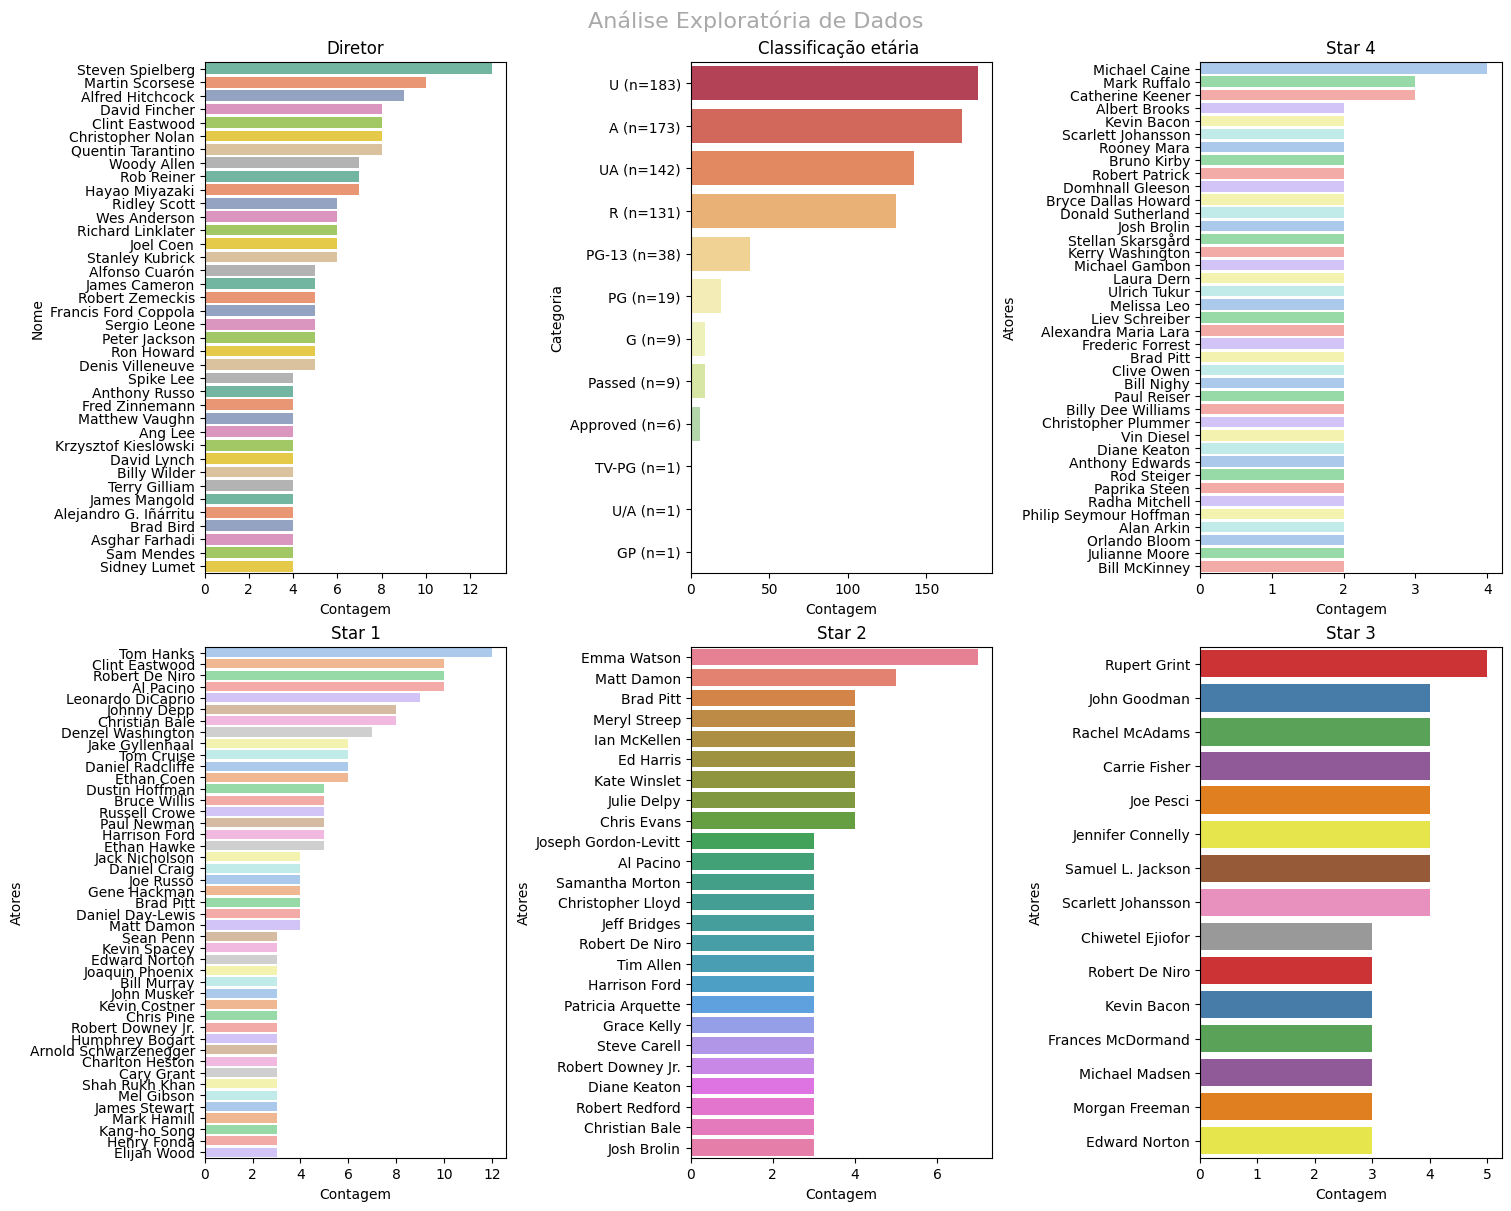

In [ ]:
mosaic = [ ['E','A','F'],
            ['E','A','F'],
            ['C','D','G'],
           ['C','D','G']
          ]

fig = plt.figure(figsize=(15, 12))
fig.suptitle('Análise Exploratória de Dados', color = 'darkgray' ,fontsize=16)
axs = fig.subplot_mosaic(mosaic, width_ratios=[1,1,1], height_ratios=[1,1,1,1])


grafico_count(df_eda, 'Certificate', title = 'Classificação etária ', tamanho_img = (15,5), ax=axs['A'], corte = 0, n=True)
grafico_count(df_eda, 'Star1'  , tamanho_img = (15,5), ax=axs['C'], corte = 3, title='Star 1', label_y='Atores', palette='pastel' )
grafico_count(df_eda, 'Star2' , tamanho_img = (15,5), ax=axs['D'], corte = 3, title='Star 2', label_y='Atores', palette='husl' )
grafico_count(df_eda, 'Director' , tamanho_img = (15,5), ax=axs['E'], corte = 4, title= 'Diretor', label_y='Nome',palette='Set2' )
grafico_count(df_eda, 'Star3',  tamanho_img = (15,5), ax=axs['G'], corte = 3, title='Star 3', label_y='Atores',palette='Set1' )
grafico_count(df_eda, 'Star4', tamanho_img = (15,5), ax=axs['F'], corte = 2, title = 'Star 4', label_y='Atores',palette='pastel6' )


fig.set_constrained_layout(True)
plt.show()

**Quais são os principais gêneros desenvolvidos?**

Um problema dessa análise categórica é que alguns filmes têm até 3 gêneros, isso cria uma categoria diferente onde para um outro filme entrar na mesma deve estar na mesma sequência dos gêneros, por isso separar essas categorias pode corroborar bastante para nossa análise.

/tmp/ipython-input-2234922447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, y=coluna, order = contagem[contagem >= corte].index, palette=palette, ax=ax)
/tmp/ipython-input-2234922447.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna].value_counts().items()])
/tmp/ipython-input-2234922447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, y=coluna, order = contagem[contagem >= corte].index, palette=palette, ax=ax)
/tmp/ipython-input-2234922447.py:9: UserWarning: set_ticklabels() should only be

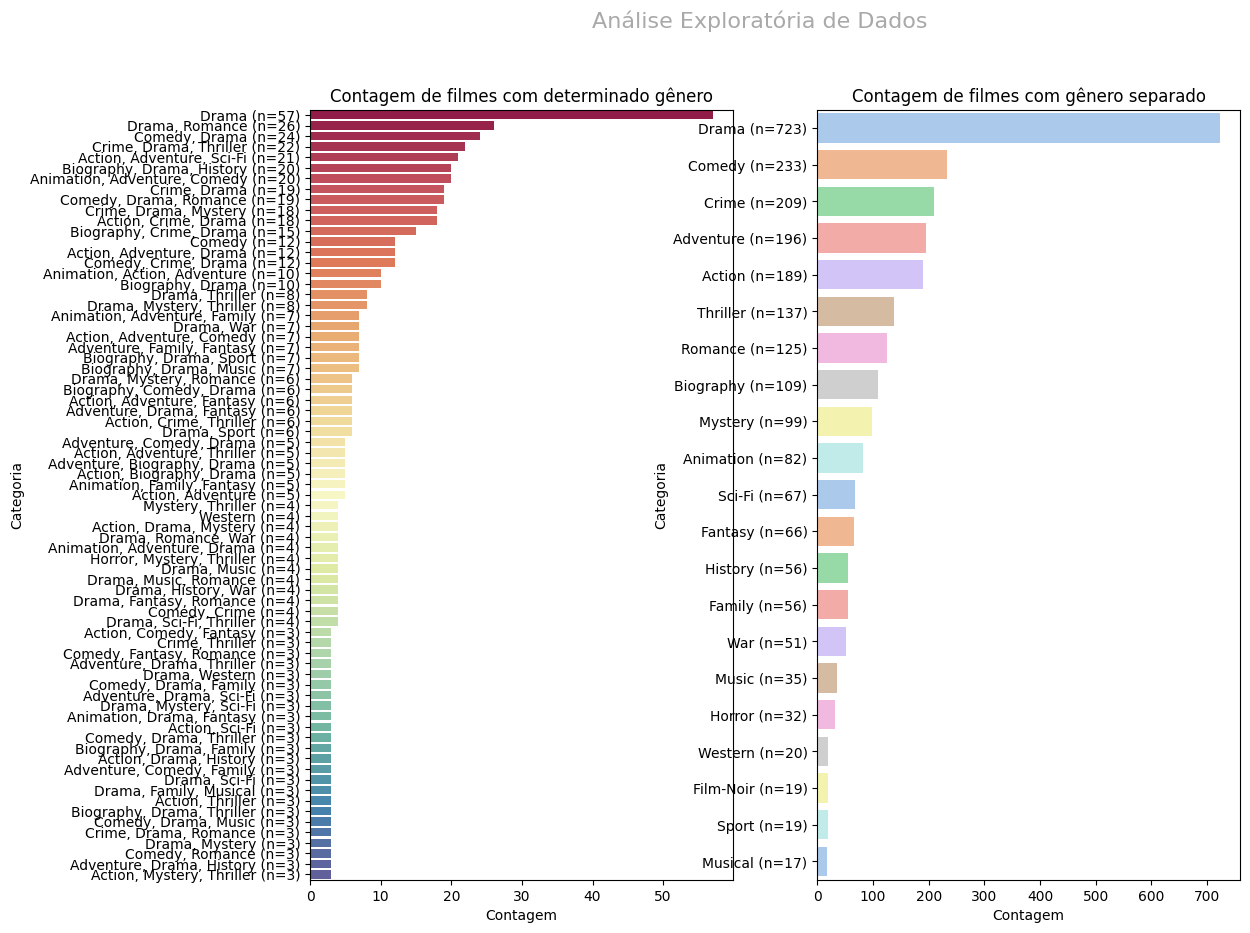

In [ ]:
mosaic = [ ['A','B'],
          ['A', 'B'],
          ['A','B']]

fig = plt.figure(figsize=(12, 10))
fig.suptitle('Análise Exploratória de Dados', color = 'darkgray' ,fontsize=16)
axs = fig.subplot_mosaic(mosaic, width_ratios=[1,1], height_ratios=[1,1,1])


grafico_count(df_eda, 'Genre', title = 'Contagem de filmes com determinado gênero', tamanho_img = (12,10), ax=axs['A'], corte = 3, n=True)
grafico_count(df_categoric, 'Genre_list', title = 'Contagem de filmes com gênero separado', tamanho_img = (12,8), ax=axs['B'], corte = 3, n=True, palette='pastel')


Qual a distribuição de arrecadação por gênero e faixa etária?

/tmp/ipython-input-4058091609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_ref, y=coluna_y, x=coluna_x, order = df_ref[coluna_y].value_counts().index , ax=ax, palette=palette)
/tmp/ipython-input-4058091609.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna_y].value_counts().items()])
/tmp/ipython-input-4058091609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_ref, y=coluna_y, x=coluna_x, order = df_ref[coluna_y].value_counts().index , ax=ax, palette=palette)
/tmp/ipython-input-4058091609.py:9: UserWa

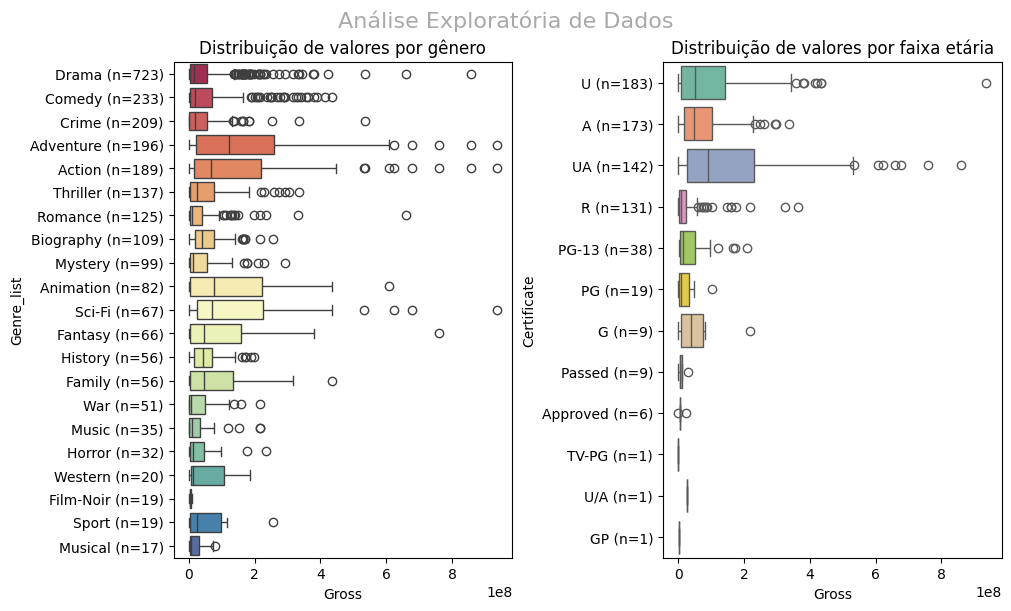

In [ ]:
mosaic = [ ['A','B'],
            ['A','B']]


fig = plt.figure(figsize=(10, 6))
fig.suptitle('Análise Exploratória de Dados', color = 'darkgray' ,fontsize=16)
axs = fig.subplot_mosaic(mosaic, width_ratios=[1,1], height_ratios=[1,1])


grafico_boxplot(df_categoric.reset_index(),'Gross','Genre_list', title = 'Distribuição de valores por gênero', ax=axs['A'])
grafico_boxplot(df_eda,'Gross','Certificate', title = 'Distribuição de valores por faixa etária',  ax=axs['B'], palette='Set2')




fig.set_constrained_layout(True)
plt.show()

- Filmes de longa duração arrecadação mais?
- Qual a distribuição da arrecadação dos filmes, segue a distribuição normal (sino)?
- Ao longo dos anos, com a melhoria da técnologia os filmes arrecadam mais pois a qualidade sonora e visual é melhor?
- Filmes com maiores pontuação tendem a arrecadar mais?

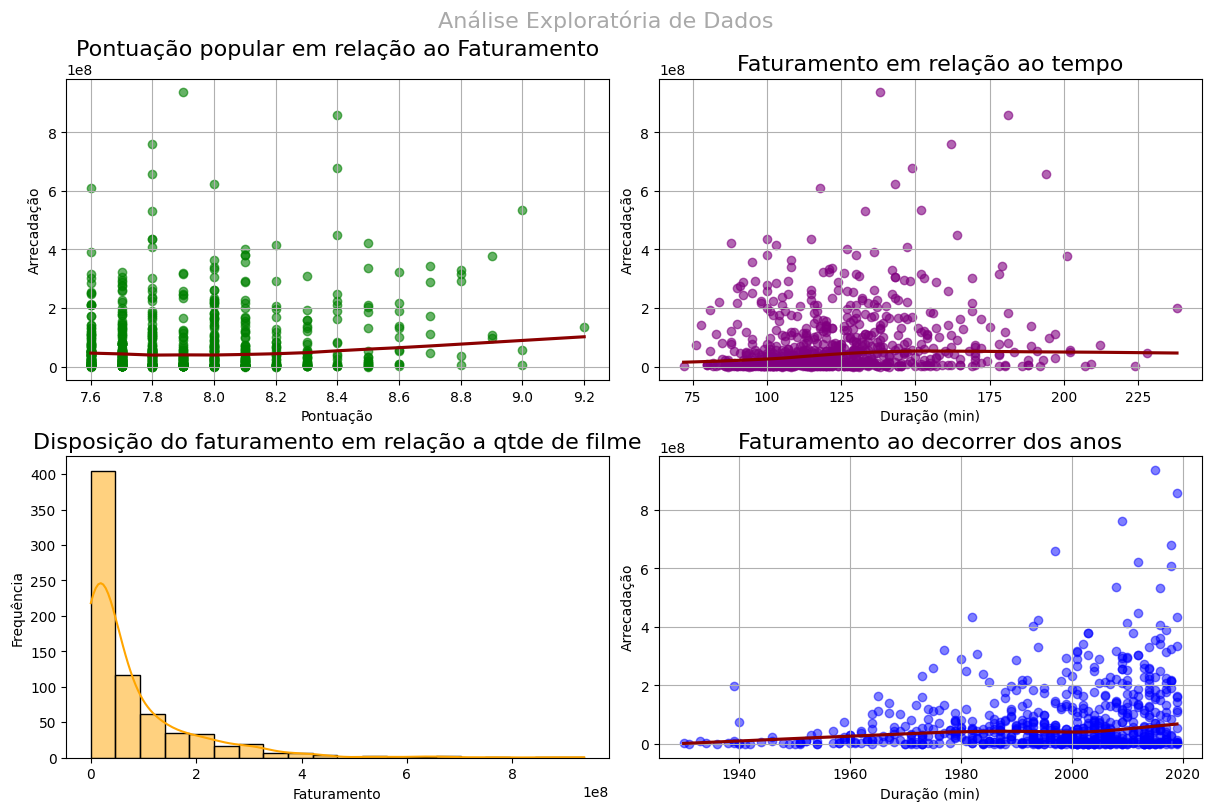

In [ ]:
mosaic = [ ['A', 'B'],
          ['C', 'D']]

fig = plt.figure(figsize=(12, 8))
fig.suptitle('Análise Exploratória de Dados', color = 'darkgray' ,fontsize=16)
axs = fig.subplot_mosaic(mosaic, width_ratios=[1,1], height_ratios=[1,1])

grafico_scatter(df_eda,'IMDB_Rating', 'Gross', ax=axs['A'], label_x='Pontuação', label_y='Arrecadação', title='Pontuação popular em relação ao Faturamento')
grafico_scatter(df_eda,'Runtime', 'Gross', ax=axs['B'], color_kws='Purple', label_x='Duração (min)', label_y='Arrecadação', title = 'Faturamento em relação ao tempo')
grafico_hist(df_eda,'Gross', bins=20, corte = 0, ax=axs['C'], tipo='linear', title='Disposição do faturamento em relação a qtde de filme', label_x='Faturamento')
grafico_scatter(df_eda,'Released_Year', 'Gross', ax=axs['D'], color_kws='Blue',alpha=0.5, label_x='Duração (min)', label_y='Arrecadação', title = 'Faturamento ao decorrer dos anos')

fig.set_constrained_layout(True)
plt.show()

No geral a maior parte dos filmes tem um faturamento baixo, isso é coerente pois nem todos são grandes sucessos.

A maioria dos filmes tem um tempo médio centrado entre 100 a 150 minutos e a duração não tem impacto direto com a arrecadação, por outro lado com o decorror dos anos os filmes tendem a faturar mais.

- Filmes mais longos tendem a ter maior apreço pelo público?
- Com a produção em massa de filmes devido a tecnologia a média de pontuação tende a diminuir?
- Existe algum gênero preferido pelo publico?

/tmp/ipython-input-4058091609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_ref, y=coluna_y, x=coluna_x, order = df_ref[coluna_y].value_counts().index , ax=ax, palette=palette)
/tmp/ipython-input-4058091609.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( [f'{label} (n={count})' for label, count in df_ref[coluna_y].value_counts().items()])


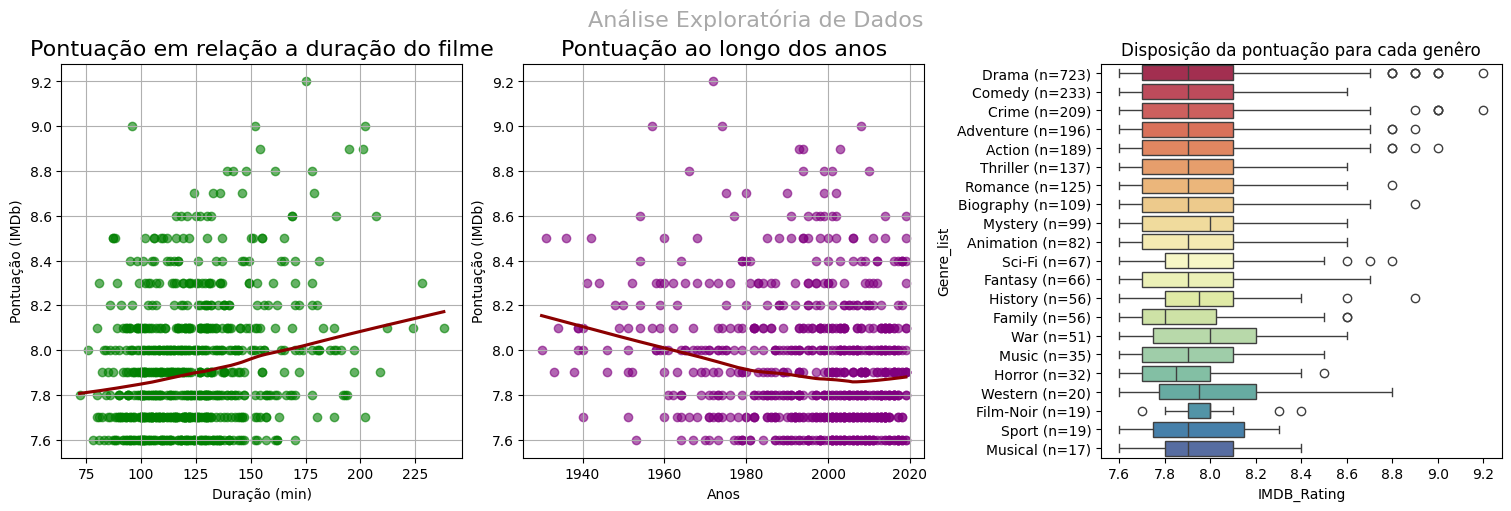

In [ ]:
mosaic = [ ['A','F','C'],
            ['A','F','C']]

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Análise Exploratória de Dados', color = 'DarkGray' ,fontsize=16)
axs = fig.subplot_mosaic(mosaic, width_ratios=[1,1,1], height_ratios=[1,1])

grafico_scatter(df_eda, 'Runtime','IMDB_Rating', ax=axs['A'], label_x='Duração (min)', label_y='Pontuação (IMDb)', title='Pontuação em relação a duração do filme')
grafico_boxplot(df_categoric.reset_index(),'IMDB_Rating','Genre_list', title = 'Disposição da pontuação para cada genêro', ax=axs['C'])
grafico_scatter(df_eda,'Released_Year', 'IMDB_Rating', ax=axs['F'], color_kws='Purple', label_x='Anos', label_y='Pontuação (IMDb)', title = 'Pontuação ao longo dos anos')


fig.set_constrained_layout(True)
plt.show()

Quais váriaveis tem mais influÊncia com 'IMDB_Rating'?

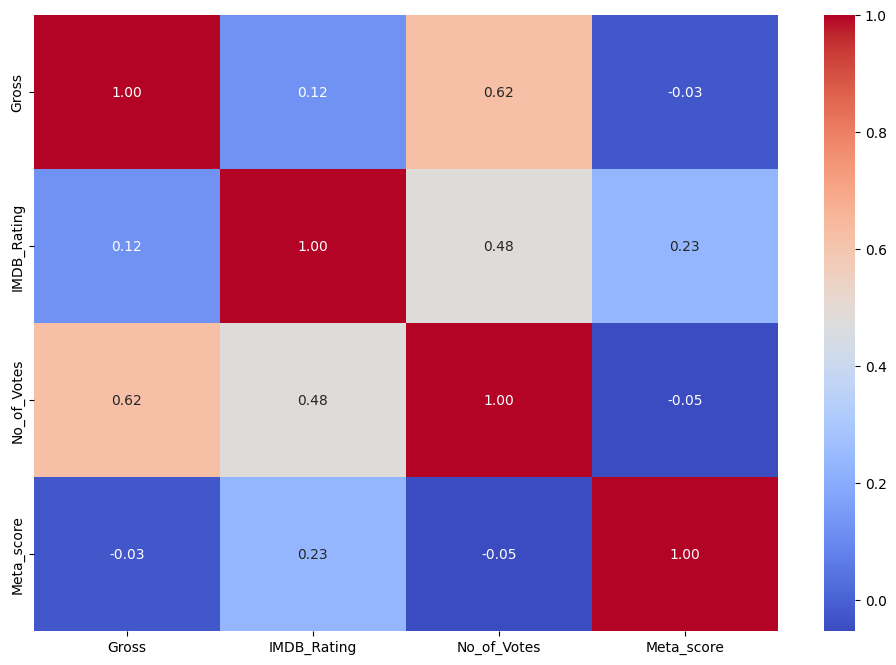

In [ ]:
df_eda_mean = df_eda.groupby('Director')[['Gross', 'IMDB_Rating', 'No_of_Votes', 'Meta_score']].mean().sort_values(by='Meta_score', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(df_eda_mean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Com base nas análises é possivel agrupar algumas categorias ditas como raras, pois pode facilitar o treinamento.

Os atores deveram ter feito mais de dois filmes para não entrar na subcategoria nova, o mesmo é valído para diretor. Enquanto a faixa etária deve ter mais de 30 filmes produzidos para preservar seu rótulo original.

##Questões:

a. Qual filme você recomendaria para uma pessoa que você não
conhece?

- A indicação são filmes com um bom número de votos e um Ranting superior a 8

b. Quais são os principais fatores que estão relacionados com alta
expectativa de faturamento de um filme?

- Pelo heatmap, número de votos tem um relação forte com o faturamento, porém para um lançamento, um filme que tenho algum dos *Top_10* diretores e estrelas pode ser uma aposta conservadora, desde que alinhado com o gênero do filme.

#Etapa 03: Desenvolver um modelo de predição

*Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

    Para prever uma nota, o melhor modelo a se utilizar é regressão, pois com <br> base nos dados o modelo aprende padrões e consegue prever um valor <br> com base em outras caracteristicas.

Para treinar o modelo, variáveis categóricas terão de ser tratadas, além de fazer agrupamento de variáveis raras, uma medida necessária para usar esse tipo de variável temos 2 formas, que são custosas pois criam uma matriz esparsa, one-hot enconding e variáveis dummies em essência a diferença entre essas abordagens é que Dummies cria uma coluna a menos que o outro método, pois ela utiliza uma categoria como referência. Para criar essas variaveis dummies a separação dos gêneros como ja citado anteriormente pode ser uma abordagem que ajuda o modelo.

R² -> Mede o ajuste do modelo, calculando o quadrado da distância de um ponto para a reta que o modelo gera para a tendência dos valores. Quanto mais próximo de 1 melhor o modelo. A escolha é devido o cálculo do ajuste, pois o quadrado da distancia implica que valores muito distante tem um peso maior.

RSME -> Mede a raiz do erro quadrático médio, indica o quão preciso o modelo está, ou seja quantoo menor o valor, mais precisa a previsão.

In [ ]:

df_train = df_eda.copy()
df_train.drop(['Overview'], axis=1, inplace=True)
df_train = agrupar_categorias_raras(df_train, 'Certificate', corte=30, nova_categoria='Unknown')
df_train = agrupar_categorias_raras(df_train, 'Star1', corte=2, nova_categoria='Others')
df_train = agrupar_categorias_raras(df_train, 'Star2', corte=2, nova_categoria='estrela2')
df_train = agrupar_categorias_raras(df_train, 'Star3', corte=2, nova_categoria='estrela3')
df_train = agrupar_categorias_raras(df_train, 'Star4', corte=2, nova_categoria='Unpopular')
df_train = agrupar_categorias_raras(df_train, 'Director', corte=2)

### Encoding

Precisamor Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)

- Features de Valores True ou False, vamos substituir True por 1 e False por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

Após agrupar valores raros, uma boa escolha é usar uma abordagem já comentada, separar os gêneros que estão agrupador em uma célula, o que acaba criando um falso gênero.

In [ ]:
genre_dummies = df_train['Genre'].str.get_dummies(sep=',')
genre_dummies.columns = genre_dummies.columns.str.strip()

df_sem_duplicadas = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()
df_train = df_train.merge(df_sem_duplicadas, left_index=True, right_index=True)
df_train

/tmp/ipython-input-969454024.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_sem_duplicadas = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Others,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,estrela2,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,estrela2,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,estrela2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971,Unknown,157,"Drama, War, Western",7.6,77.0,Sergio Leone,Others,estrela2,...,0,0,0,0,0,0,0,0,1,1
990,Kelly's Heroes,1970,Unknown,144,"Adventure, Comedy, War",7.6,50.0,Outros,Clint Eastwood,estrela2,...,0,0,0,0,0,0,0,0,1,0
991,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,65.0,Outros,Others,estrela2,...,0,0,0,0,0,0,0,0,0,0
993,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,96.0,Outros,Others,estrela2,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_train.drop(['Genre'], axis=1, inplace=True)

In [ ]:
# df_without_nan = df_train.copy()
df_without_nan = df_imdb.copy()
df_without_nan_enconding = df_without_nan #.drop(['Released_Year', 'Overview', 'Series_Title'], axis=1)

In [ ]:
df_without_nan_enconding.drop([ 'Overview'], axis=1, inplace=True)

In [ ]:
df_without_nan_enconding.dropna(inplace=True)

In [ ]:
colunas_categoricas = ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre','Series_Title']
df_without_nan_enconding = pd.get_dummies(data=df_without_nan_enconding, columns=colunas_categoricas)

#Treino


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

###Métricas de avaliação

In [ ]:
def avaliar_modelo(nome_modelo, y_teste, y_pred):
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
    r2 = r2_score(y_teste, y_pred)
    return f'Modelo {nome_modelo}:\n RMSE {rmse},\n R2: {r2}\n\n'

Modelos

In [ ]:

modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'ExtraTreesRegressor': ExtraTreesRegressor()
}

y = df_without_nan_enconding['IMDB_Rating']
X = df_without_nan_enconding.drop('IMDB_Rating', axis=1)

###Separar os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
for nome_modelo, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, y_pred))

Modelo RandomForest:
 RMSE 0.18827906679449719,
 R2: 0.5768064217826903


Modelo LinearRegression:
 RMSE 0.18962798185335025,
 R2: 0.5707208051515618


Modelo ExtraTreesRegressor:
 RMSE 0.1995458129566519,
 R2: 0.5246426277934801




In [ ]:
modelo = modelo_lr.fit(x_train, y_train)

salvar o modelo para testar novas informações

In [ ]:
train_columns = X.columns

import joblib
joblib.dump({'model': modelo, 'columns': train_columns}, 'imdb_model.joblib')


['imdb_model.joblib']

In [ ]:
import pickle

with open('imdb_model.pkl', 'wb') as f:
    pickle.dump({'model': modelo, 'columns': train_columns}, f, protocol=pickle.HIGHEST_PROTOCOL)


#Etapa 4: Testando Filmes

In [ ]:
filme_novo = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

filme_novo = {
    'Series_Title': "Schindler's List",
    'Released_Year': 1993,
    'Certificate': 'R',
    'Runtime': '195 min',
    'Genre': 'History',
    'Meta_score': 95.0,
    'Director': 'Steven Spielberg',
    'Star1': 'Liam Neeson',
    'Star2': 'Ralph Fiennes',
    'Star3': 'Ben Kingsley',
    'Star4': 'Caroline Goodall',
    'No_of_Votes': 1_513_110,
    'Gross': '96,898,818'
}

prever_filme(filme_novo)

A nota IMDB prevista para o filme é: 8.94


In [ ]:
def prever_filme(filme_novo):
    df_novo_filme = pd.DataFrame([filme_novo])

    if 'Released_Year' in df_novo_filme.columns:
        df_novo_filme['Released_Year'] = df_novo_filme['Released_Year'].astype(int)

    if 'Overview' in df_novo_filme.columns:
        df_novo_filme.drop('Overview', axis=1, inplace=True)

    if 'Runtime' in df_novo_filme.columns:
        df_novo_filme['Runtime'] = df_novo_filme['Runtime'].str.replace(' min', '').astype(float)

    if 'Gross' in df_novo_filme.columns:
        df_novo_filme['Gross'] = df_novo_filme['Gross'].str.replace(',', '').astype(float)



    df_novo_filme_encoded = pd.get_dummies(df_novo_filme)

    bundle = joblib.load('imdb_model.joblib')
    model = bundle['model']
    colunas_do_modelo = bundle['columns']


    df_final = df_novo_filme_encoded.reindex(columns=colunas_do_modelo, fill_value=0)

    nota_prevista = model.predict(df_final)

    nota = nota_prevista[0]

    return print(f'A nota IMDB prevista para o filme é: {nota:.2f}')

##TESTES

1° Teste:

**Data** = df_train -> Os gêneros foram separados para colunas individuais. <br>
**Modelo vencedor** = *RandomForest* ->

    RMSE 0.1966325955236759,
    R2: 0.5399037161611708

**Resultado de predição** = 8.81

2° Teste:

**Data** = df_train -> Os gêneros foram separados para colunas individuais. <br>
removendo a feature **Series_Title**<br>
**Modelo vencedor** = *RandomForest* ->

    RMSE 0.19335687502357138,
    R2: 0.5551056004282972

**Resultado de predição** = 8.80

3° Teste:

**Data** =  df_imdb -> O dataframe inicial, removendo apenas a coluna 'Overview'<br>
**Modelo vencedor** = *LinearRegression* ->

    RMSE 0.1896279822173682,
    R2: 0.5707208035034363

**Resultado de predição** = 9.51

Tendo em vista que o filme tem o Rating **9.3**, o treino mais próximo foi do 3° teste.

Testando outro filme, o resultado foi bem promissor:

Valor da pontuação do filme: 9.0
Predição: 8.94

[FONTE:](https://www.imdb.com/title/tt0108052/?ref_=ttrt_ov_bk) IMDb
---

